In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

df = pd.read_csv('Top5_Categories.csv', encoding='utf-8')

# 🔧 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\gram\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gram\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


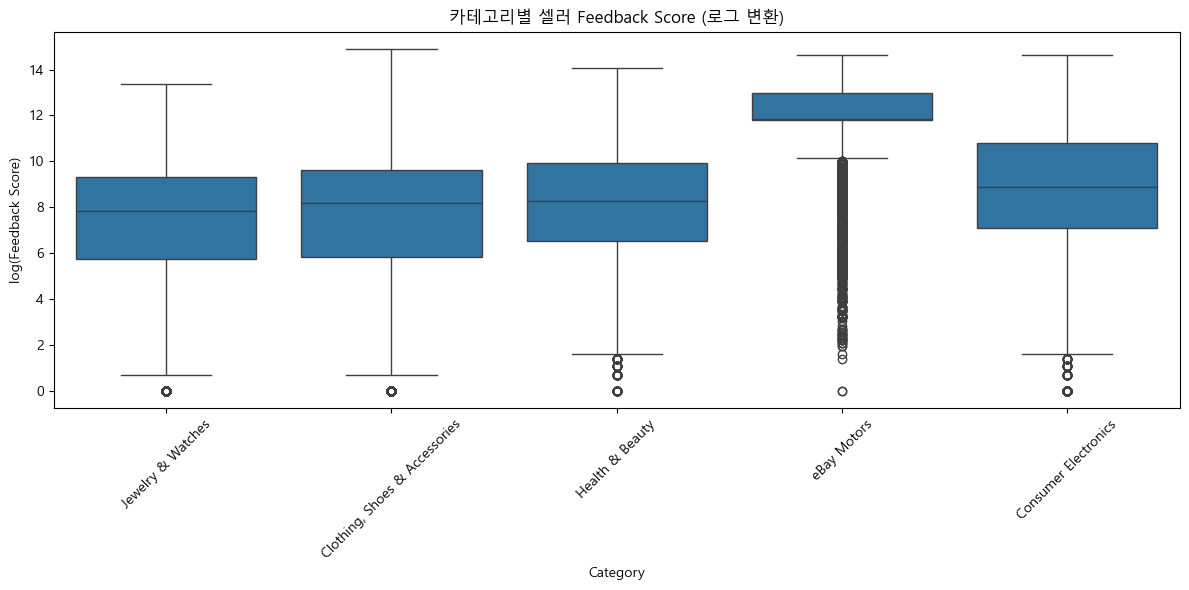

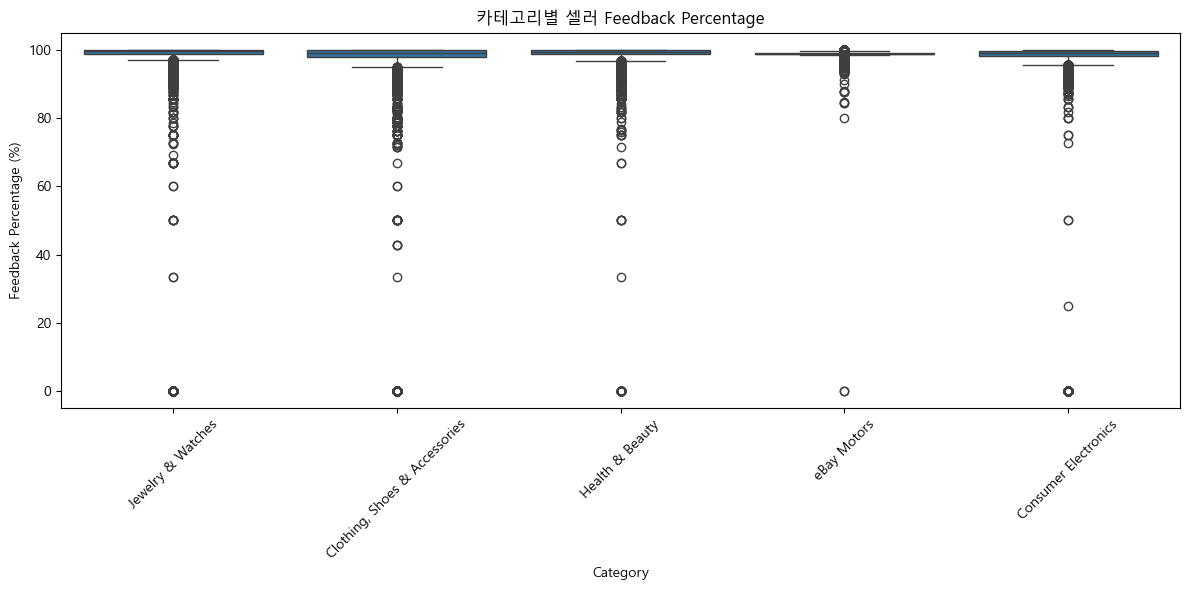

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 로그 변환된 피드백 점수 컬럼 추가
df['log_feedbackScore'] = np.log1p(df['feedbackScore'])  # log(1 + x) 처리

# 시각화 1: 카테고리별 로그 피드백 점수
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category_1', y='log_feedbackScore')
plt.title('카테고리별 셀러 Feedback Score (로그 변환)')
plt.ylabel('log(Feedback Score)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화 2: 카테고리별 피드백 퍼센트
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category_1', y='feedbackPercentage')
plt.title('카테고리별 셀러 Feedback Percentage')
plt.ylabel('Feedback Percentage (%)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


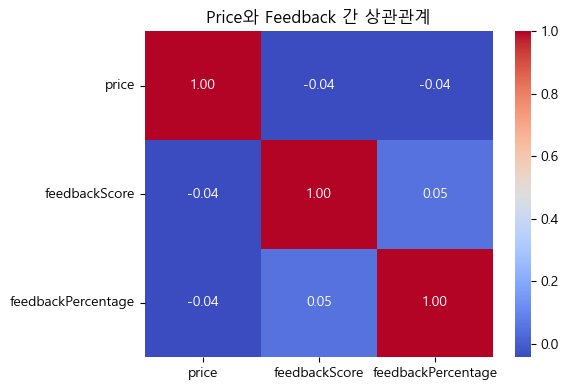

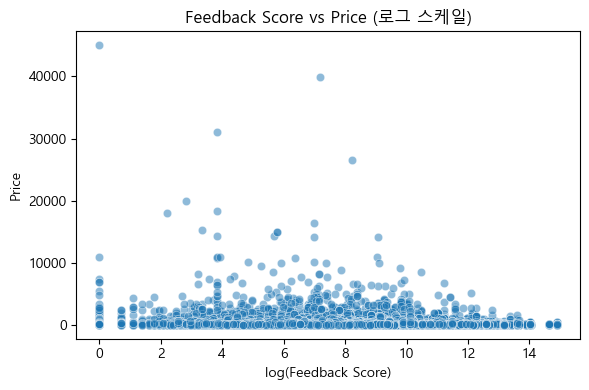

In [3]:
# 상관계수 확인
correlations = df[['price', 'feedbackScore', 'feedbackPercentage']].corr()

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Price와 Feedback 간 상관관계")
plt.tight_layout()
plt.show()

# 추가: Scatter plot (log(feedbackScore) vs price)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='log_feedbackScore', y='price', data=df, alpha=0.5)
plt.title('Feedback Score vs Price (로그 스케일)')
plt.xlabel('log(Feedback Score)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


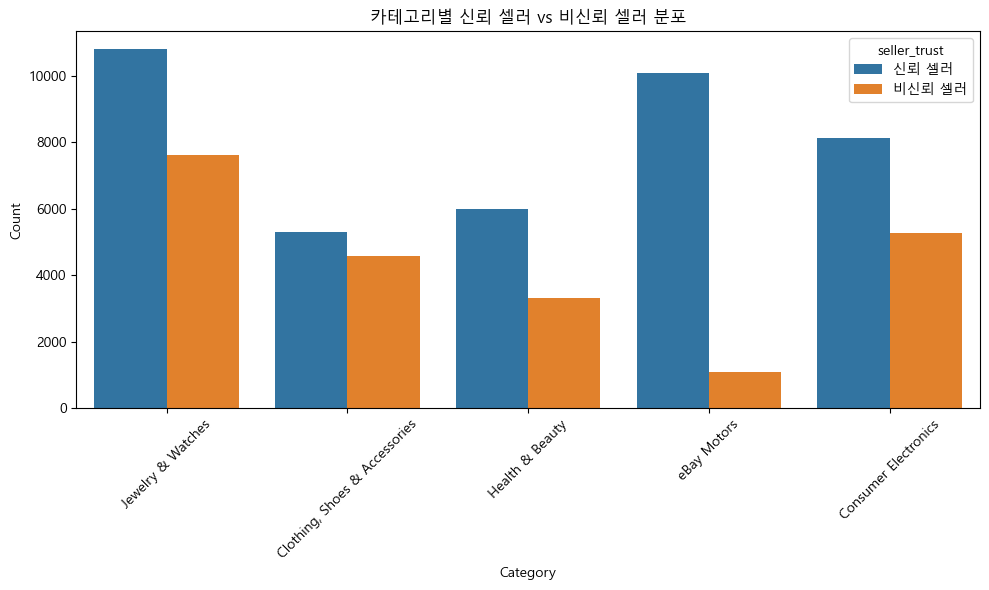

In [4]:
# 신뢰도 그룹 기준 정의
def label_trust(row):
    if row['feedbackScore'] >= 1000 and row['feedbackPercentage'] >= 98:
        return '신뢰 셀러'
    else:
        return '비신뢰 셀러'

df['seller_trust'] = df.apply(label_trust, axis=1)

# 시각화: 카테고리별 셀러 신뢰도 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category_1', hue='seller_trust')
plt.title('카테고리별 신뢰 셀러 vs 비신뢰 셀러 분포')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


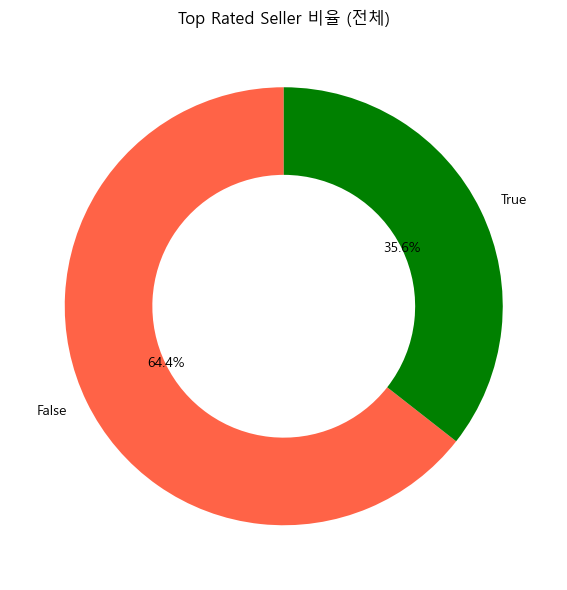

In [5]:
import matplotlib.pyplot as plt

# Top Rated 여부 비율 계산 (%로)
toprated_counts = df['topRatedBuyingExperience'].value_counts(normalize=True) * 100

# 라벨과 비율
labels = toprated_counts.index.astype(str)  # True / False
sizes = toprated_counts.values             # 비율 값

# 색상 정의: True → green, False → tomato
colors = ['green' if label == 'True' else 'tomato' for label in labels]

# 도넛 차트 시각화
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # 도넛 모양
)

plt.title('Top Rated Seller 비율 (전체)')
plt.tight_layout()
plt.show()


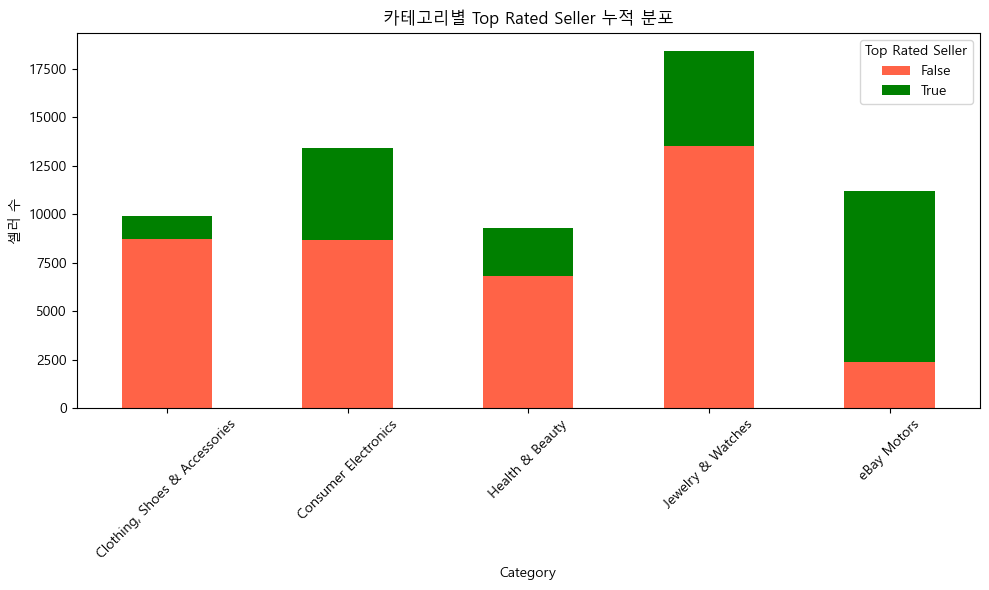

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 카테고리별 TopRated 여부에 따른 셀러 수 집계
stacked_data = df.groupby(['category_1', 'topRatedBuyingExperience']).size().unstack(fill_value=0)

# 색상 지정: 컬럼 순서에 따라 색 매핑
color_order = []
for col in stacked_data.columns:
    color_order.append('green' if col is True else 'tomato')

# 누적 막대그래프 그리기 (수동 색상)
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=color_order
)

plt.title('카테고리별 Top Rated Seller 누적 분포')
plt.xlabel('Category')
plt.ylabel('셀러 수')
plt.xticks(rotation=45)
plt.legend(title='Top Rated Seller')
plt.tight_layout()
plt.show()


C:\Users\gram\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gram\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


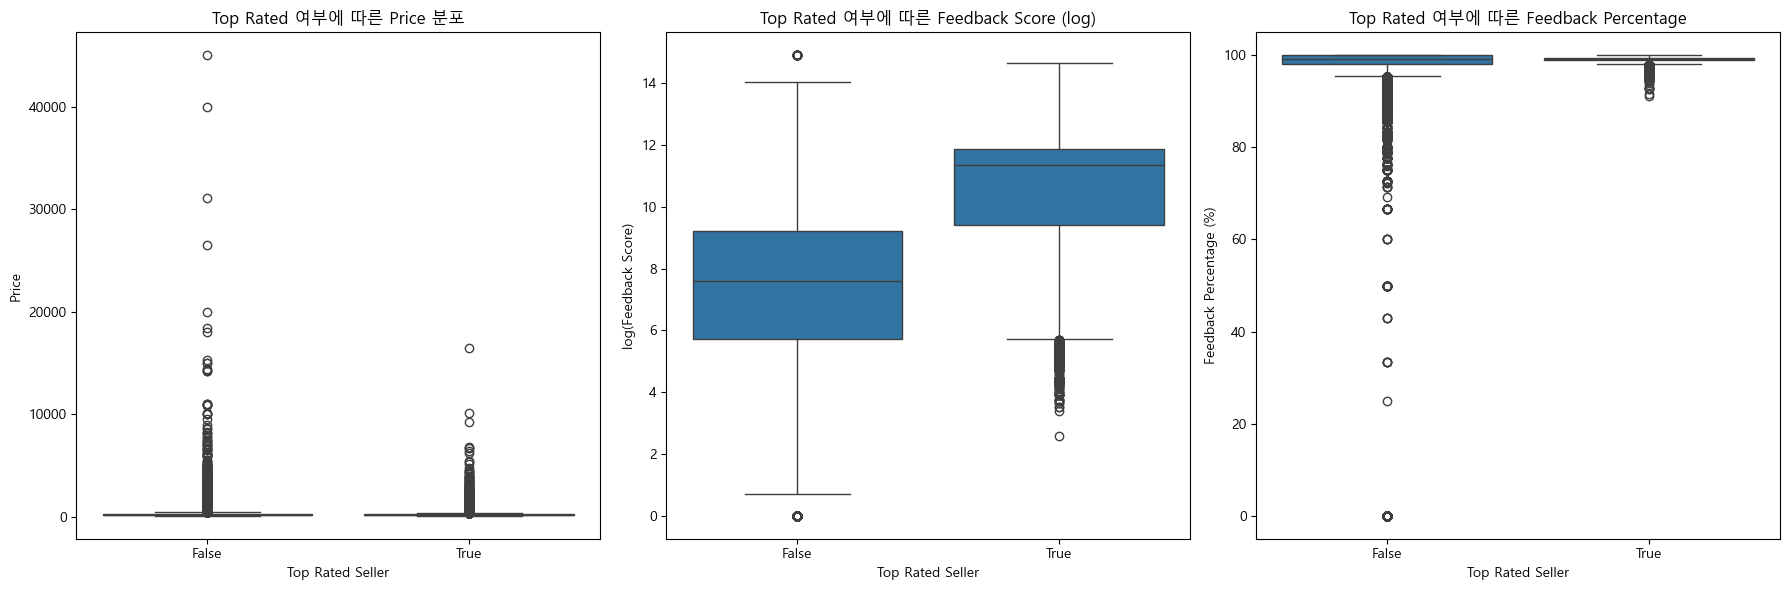

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# price
sns.boxplot(data=df, x='topRatedBuyingExperience', y='price', ax=axes[0])
axes[0].set_title('Top Rated 여부에 따른 Price 분포')
axes[0].set_xlabel('Top Rated Seller')
axes[0].set_ylabel('Price')

# feedbackScore (log scale)
df['log_feedbackScore'] = np.log1p(df['feedbackScore'])
sns.boxplot(data=df, x='topRatedBuyingExperience', y='log_feedbackScore', ax=axes[1])
axes[1].set_title('Top Rated 여부에 따른 Feedback Score (log)')
axes[1].set_xlabel('Top Rated Seller')
axes[1].set_ylabel('log(Feedback Score)')

# feedbackPercentage
sns.boxplot(data=df, x='topRatedBuyingExperience', y='feedbackPercentage', ax=axes[2])
axes[2].set_title('Top Rated 여부에 따른 Feedback Percentage')
axes[2].set_xlabel('Top Rated Seller')
axes[2].set_ylabel('Feedback Percentage (%)')

plt.tight_layout()
plt.show()


c:\Temp\ipykernel_10760\35812070.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sellers_username.values, y=top_sellers_username.index, palette='mako')


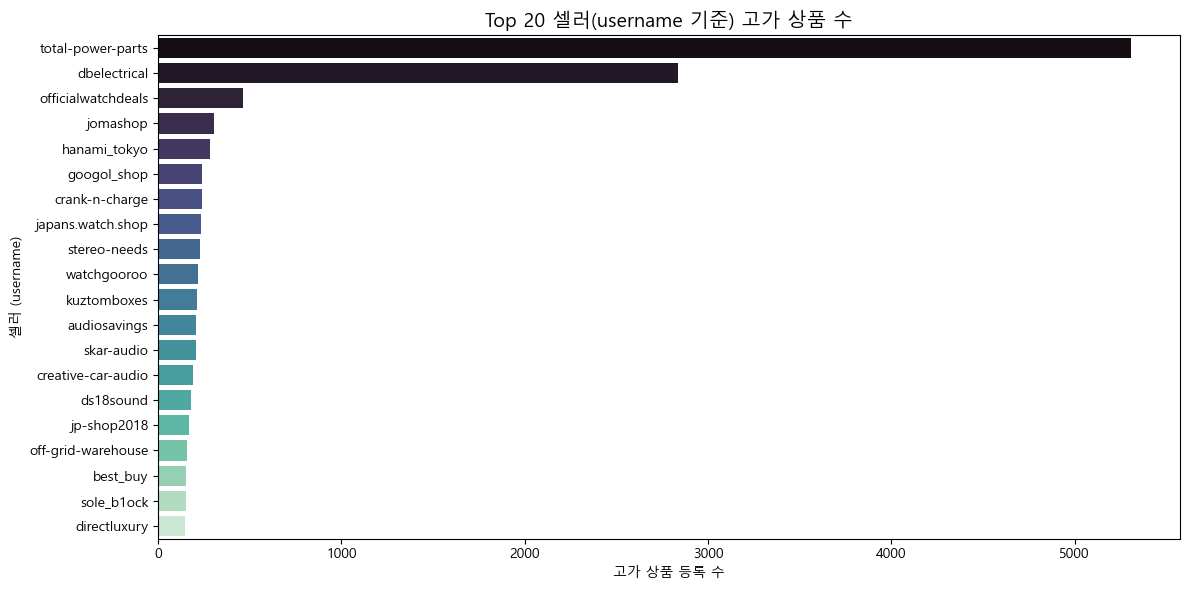

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 'seller' 컬럼에서 'username'만 추출
df['sellerUsername'] = df['seller'].apply(lambda x: json.loads(x.replace("'", '"'))['username'])

# sellerUsername 기준 상위 20명 추출
top_sellers_username = df['sellerUsername'].value_counts().head(20)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sellers_username.values, y=top_sellers_username.index, palette='mako')
plt.title('Top 20 셀러(username 기준) 고가 상품 수', fontsize=14)
plt.xlabel('고가 상품 등록 수')
plt.ylabel('셀러 (username)')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import json

# seller 컬럼에서 username 추출
df['sellerUsername'] = df['seller'].apply(lambda x: json.loads(x.replace("'", '"'))['username'])

# 상위 20명의 셀러 username 추출
top_sellers_username = df['sellerUsername'].value_counts().head(20)
top_20_usernames = top_sellers_username.index.tolist()

# 상위 20명 데이터 필터링
top_df = df[df['sellerUsername'].isin(top_20_usernames)]

# 평균 feedbackPercentage와 feedbackScore 계산
avg_feedback = top_df.groupby('sellerUsername')[['feedbackPercentage', 'feedbackScore']].mean().round(2)

# 각 셀러의 고가 상품 등록 수 추가
avg_feedback['highPriceItemCount'] = top_df['sellerUsername'].value_counts()

# 순서를 등록 수 기준으로 정렬 (선택 사항)
avg_feedback = avg_feedback.loc[top_20_usernames]

# 결과 출력
print(avg_feedback)


                    feedbackPercentage  feedbackScore  highPriceItemCount
sellerUsername                                                           
total-power-parts                98.88      142251.23                5310
dbelectrical                     99.22      428769.03                2834
officialwatchdeals               99.40       69640.92                 463
jomashop                         98.40      186751.46                 306
hanami_tokyo                    100.00        1983.00                 281
googol_shop                      97.20       36085.28                 238
crank-n-charge                   98.05       67253.14                 238
japans.watch.shop                99.30        4598.03                 235
stereo-needs                     99.13       96907.62                 230
watchgooroo                      99.00       93579.83                 215
kuztomboxes                      97.20       10205.58                 212
audiosavings                     97.75

c:\Temp\ipykernel_10760\372519897.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_raw_df, x='highPriceItemCount', y='seller', palette='flare')


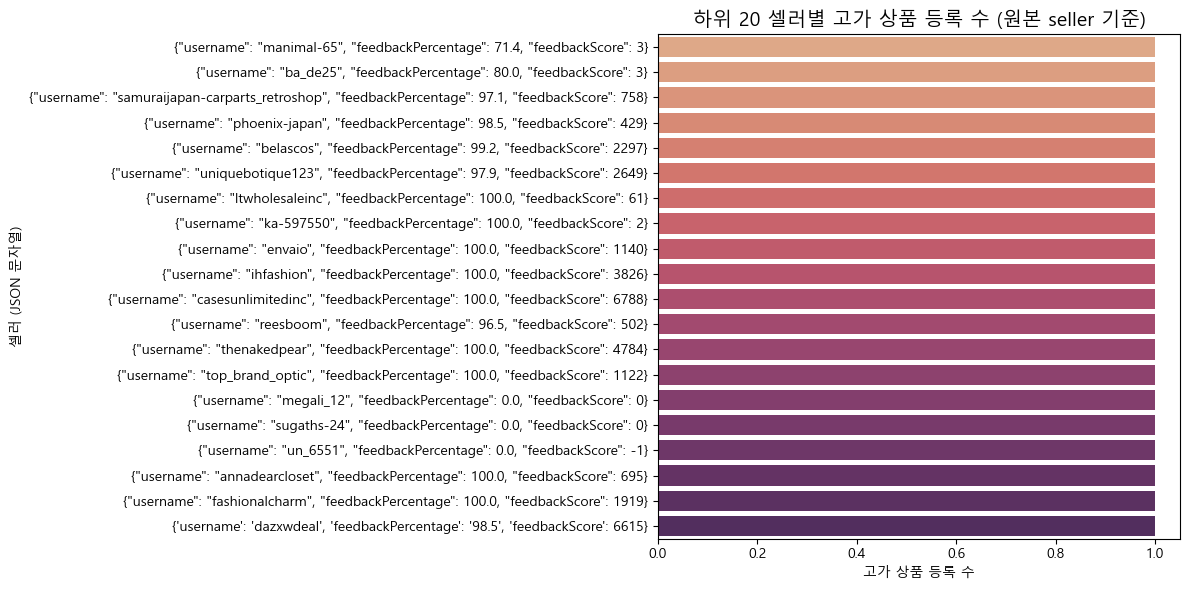

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 하위 20명의 seller 기준 고가 상품 수 추출
bottom_raw_sellers = df['seller'].value_counts().tail(20)

# 데이터프레임으로 변환
bottom_raw_df = bottom_raw_sellers.reset_index()
bottom_raw_df.columns = ['seller', 'highPriceItemCount']

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_raw_df, x='highPriceItemCount', y='seller', palette='flare')
plt.title('하위 20 셀러별 고가 상품 등록 수 (원본 seller 기준)', fontsize=14)
plt.xlabel('고가 상품 등록 수')
plt.ylabel('셀러 (JSON 문자열)')
plt.tight_layout()
plt.show()


c:\Temp\ipykernel_10760\2565883134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_user_df, x='highPriceItemCount', y='sellerUsername', palette='crest')


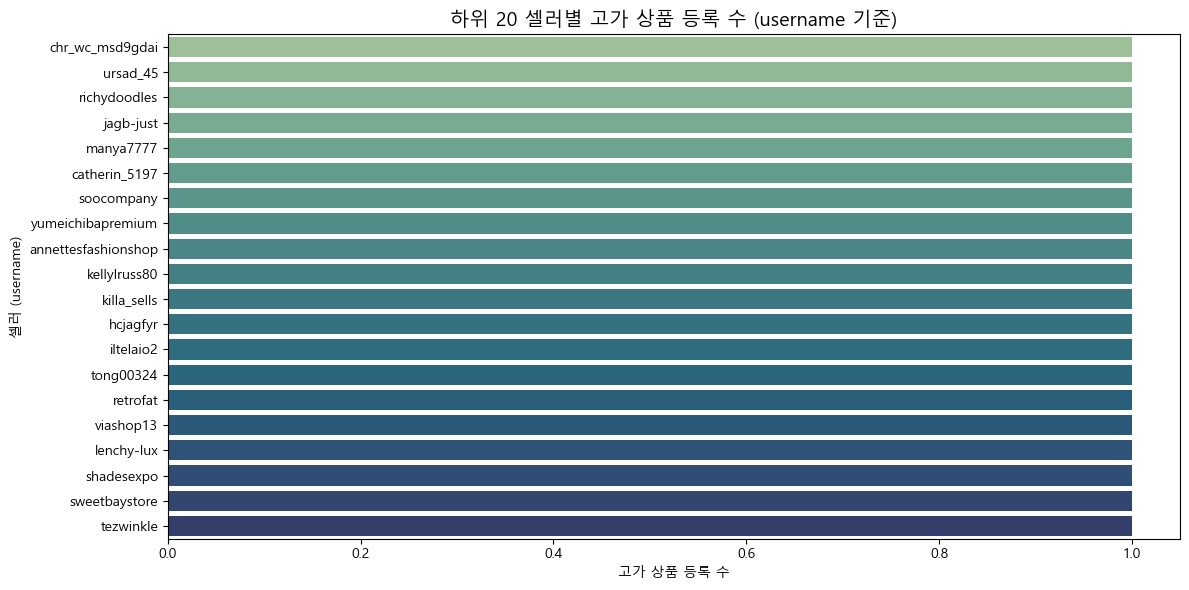

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sellerUsername 기준 고가 상품 등록 수 하위 20명 추출
bottom_sellers_username = df['sellerUsername'].value_counts().tail(20)

# 데이터프레임 변환
bottom_user_df = bottom_sellers_username.reset_index()
bottom_user_df.columns = ['sellerUsername', 'highPriceItemCount']

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_user_df, x='highPriceItemCount', y='sellerUsername', palette='crest')
plt.title('하위 20 셀러별 고가 상품 등록 수 (username 기준)', fontsize=14)
plt.xlabel('고가 상품 등록 수')
plt.ylabel('셀러 (username)')
plt.tight_layout()
plt.show()


c:\Temp\ipykernel_10760\1630823049.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=compare_df, x='group', y='feedbackPercentage', palette='pastel')


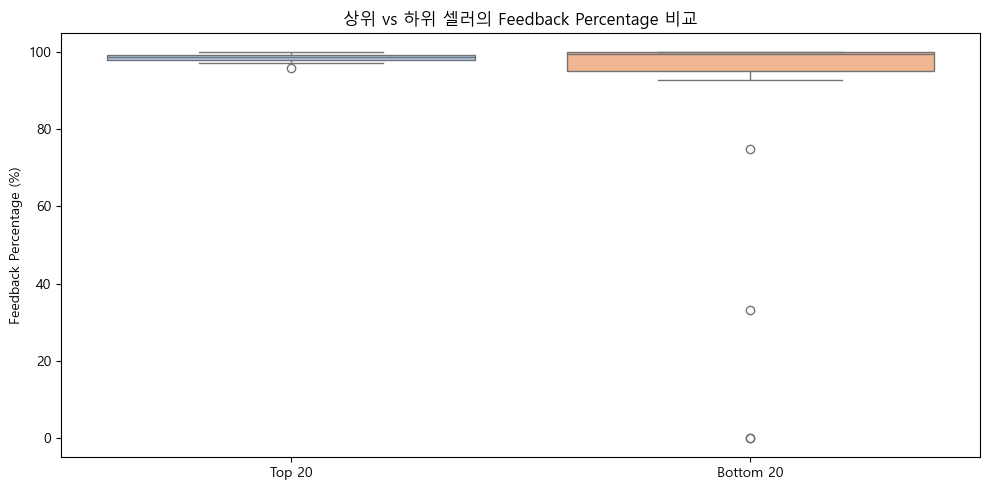

c:\Temp\ipykernel_10760\1630823049.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=compare_df, x='group', y='feedbackScore', palette='pastel')


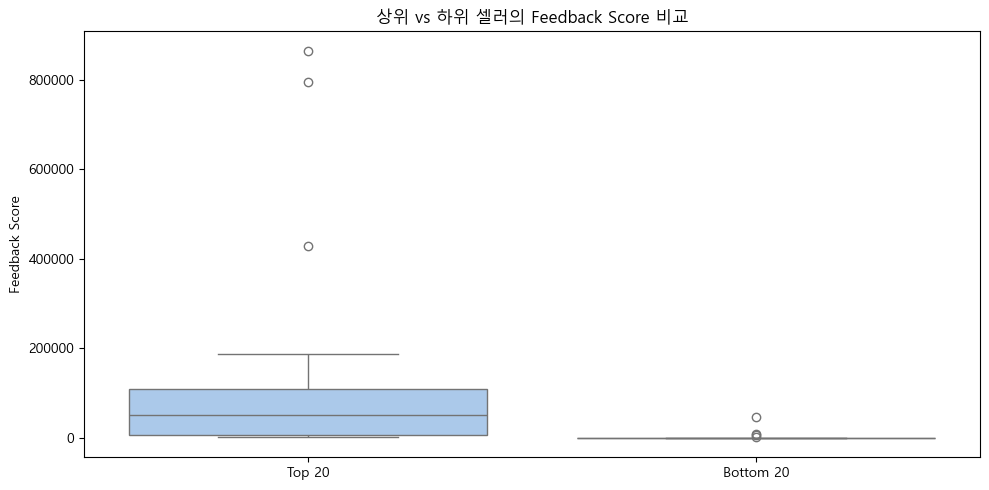

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sellerUsername 기준 상위 20명
top_sellers_fixed = df['sellerUsername'].value_counts().head(20)
top_sellers_fixed_df = top_sellers_fixed.reset_index()
top_sellers_fixed_df.columns = ['sellerUsername', 'highPriceItemCount']

# 상위 셀러 데이터
top_df = df[df['sellerUsername'].isin(top_sellers_fixed_df['sellerUsername'].tolist())]
top_summary = top_df.groupby('sellerUsername')[['feedbackPercentage', 'feedbackScore']].mean()
top_summary['group'] = 'Top 20'
top_summary['highPriceItemCount'] = top_df['sellerUsername'].value_counts()

# 하위 20명 sellerUsername 재추출
bottom_sellers_username = df['sellerUsername'].value_counts().tail(20)
bottom_20_usernames = bottom_sellers_username.index.tolist()

# 하위 셀러 데이터
bottom_df = df[df['sellerUsername'].isin(bottom_20_usernames)]
bottom_summary = bottom_df.groupby('sellerUsername')[['feedbackPercentage', 'feedbackScore']].mean()
bottom_summary['group'] = 'Bottom 20'
bottom_summary['highPriceItemCount'] = bottom_df['sellerUsername'].value_counts()

# 병합
compare_df = pd.concat([top_summary, bottom_summary]).reset_index()

# 시각화 1: Feedback Percentage
plt.figure(figsize=(10, 5))
sns.boxplot(data=compare_df, x='group', y='feedbackPercentage', palette='pastel')
plt.title('상위 vs 하위 셀러의 Feedback Percentage 비교')
plt.ylabel('Feedback Percentage (%)')
plt.xlabel('')
plt.tight_layout()
plt.show()

# 시각화 2: Feedback Score
plt.figure(figsize=(10, 5))
sns.boxplot(data=compare_df, x='group', y='feedbackScore', palette='pastel')
plt.title('상위 vs 하위 셀러의 Feedback Score 비교')
plt.ylabel('Feedback Score')
plt.xlabel('')
plt.tight_layout()
plt.show()
